In [3]:
%matplotlib inline
import pandas as pd

from more_itertools import unique_everseen
from collections import Counter


def make_nice_string(s):
    N= s.split('-')
    NU= list(unique_everseen(N))
    NC= Counter(N)
    NN = [p+'-'+str(NC[p]) for p in NU if p !='']
    return ' '.join(NN)
#test
s= 'Samsom-Samsom-Pechtold-Pechtold-Pechtold-Kuzu-'
print(make_nice_string(s))


Samsom-2 Pechtold-3 Kuzu-1


In [5]:
df = pd.read_csv('Interruptors_van_Wilders.csv', index_col='date', encoding='utf-8')

In [6]:
df.head()

,termijn,spreker,rol,indegree,aantal_interrupts,interruptors,interruptie_volgorde,OnderwerpDebat,url,aantal_interrupts_mean,...,Samsom,Segers,Slob,Thieme,Van Haersma Buma,Van Ojik,Van der Staaij,Voordewind,Zijlstra,Öztürk
date,,,,,,,,,,,,,,,,,,,,,
20122013-03-08,1,Wilders,De heer,0.0,0,{},NaN,Debat verkiezingsuitslag,https://zoek.officielebekendmakingen.nl/h-tk-2...,8.416667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20122013-07-16,1,Wilders,De heer,0.0,0,{},NaN,Deelakkoord begroting 2013,https://zoek.officielebekendmakingen.nl/h-tk-2...,7.153846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20122013-100-03,1,Wilders,De heer,0.0,0,{},NaN,Aanbevelingen Europese Commissie extra bezuini...,https://zoek.officielebekendmakingen.nl/h-tk-2...,9.727273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20122013-100-06,1,Wilders,De heer,0.0,0,{},NaN,Aanbevelingen Europese Commissie bezuinigingen,https://zoek.officielebekendmakingen.nl/h-tk-2...,1.909091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20122013-17-06,1,Wilders,De heer,1.0,3,{u'Pechtold': 3},Pechtold-Pechtold-Pechtold,Eindverslag informateurs,https://zoek.officielebekendmakingen.nl/h-tk-2...,0.555556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Saving a plot to a png figure

-rw-r--r--@ 1 Tom  staff  41833 28 Mar 16:34 WildersPlot.png


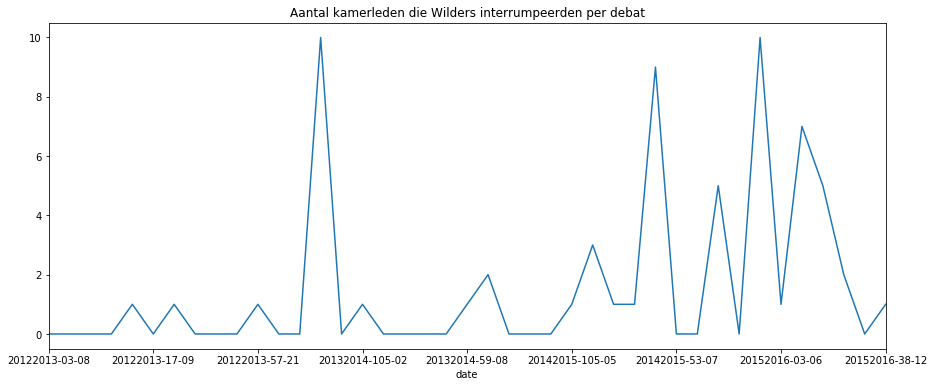

In [7]:
plot= df.indegree.plot(figsize=(15,6), title='Aantal kamerleden die Wilders interrumpeerden per debat')
fig = plot.get_figure()
fig.savefig('WildersPlot.png')
!ls -l WildersPlot.png

# Saving a dataframe to a Latex table

In [8]:
mydf=df[[ 'indegree','interruptie_volgorde' ]].fillna('')
mydf.head()

,indegree,interruptie_volgorde
date,,
20122013-03-08,0.0,
20122013-07-16,0.0,
20122013-100-03,0.0,
20122013-100-06,0.0,
20122013-17-06,1.0,Pechtold-Pechtold-Pechtold


In [10]:
mydf.interruptie_volgorde=mydf.interruptie_volgorde.apply(make_nice_string)
t= mydf.head().to_latex()

print(t)

\begin{tabular}{lrl}
\toprule
{} &  indegree & interruptie\_volgorde \\
date            &           &                      \\
\midrule
20122013-03-08  &       0.0 &                      \\
20122013-07-16  &       0.0 &                      \\
20122013-100-03 &       0.0 &                      \\
20122013-100-06 &       0.0 &                      \\
20122013-17-06  &       1.0 &           Pechtold-3 \\
\bottomrule
\end{tabular}



In [7]:
t=mydf.to_latex()

In [8]:
with  open('WildersTable.tex', 'w') as f:
    f.write(t.encode("UTF-8"))
!head WildersTable.tex

\begin{tabular}{lrl}
\toprule
{} &  indegree &                               interruptie\_volgorde \\
date            &           &                                                    \\
\midrule
20122013-03-08  &       0.0 &                                                    \\
20122013-07-16  &       0.0 &                                                    \\
20122013-100-03 &       0.0 &                                                    \\
20122013-100-06 &       0.0 &                                                    \\
20122013-17-06  &       1.0 &                                         Pechtold-3 \\


In [9]:
!ls

Interruptors_van_Wilders.csv WildersPlot.png              evaluation.tex               main.log                     main.synctex.gz              methodology.tex              titlepage.tex
PandasAndLatex.ipynb         WildersTable.tex             introduction.tex             main.out                     main.tex                     related_work.tex
README.md                    conclusions.tex              main.aux                     main.pdf                     main.toc                     sargent-lecture_slides.pdf


In [10]:
!rm *.log